In [4]:
import numpy as np 
import pandas as pd

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [7]:
import matplotlib.pyplot as plt

>**Univariate Analysis**
* Finding Missing Values
* Identify Outliers
* Check Distributions of Data

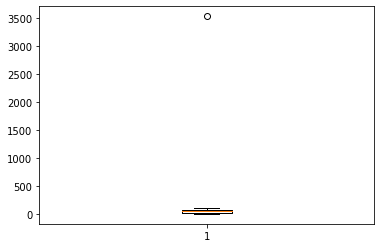

In [8]:
_ = plt.boxplot(train.x)

In [9]:
#finding the outliers Value
train[train['x'] > 500]

,x,y
213,3530.157369,NaN


In [10]:
train.iloc[213]

x    3530.157369
y            NaN
Name: 213, dtype: float64

In [11]:
#removing the outliers
train.drop(213, axis=0, inplace=True)

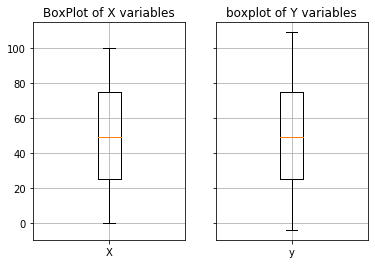

In [12]:
fig, ax = plt.subplots(1,2, sharey=True)
ax[0].set_title('BoxPlot of X variables')
ax[0].grid(True)
ax[0].set(xticklabels=['X'])
_ = ax[0].boxplot(train.x)

ax[1].set(title='boxplot of Y variables', xticklabels=['y'])
ax[1].grid(True)
_ = ax[1].boxplot(train.y)



In [13]:
#checking for null values
train.isnull().sum()

x    0
y    0
dtype: int64

> Bivariate Analysis

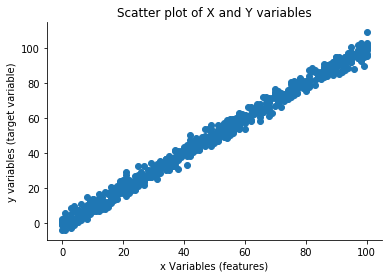

In [14]:
plt.scatter(train.x, train.y)
plt.xlabel('x Variables (features)')
plt.ylabel('y variables (target variable)')
plt.title('Scatter plot of X and Y variables')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [15]:
train.corr()

,x,y
x,1.00000,0.99534
y,0.99534,1.00000


In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
slr = LinearRegression()
slr.fit(train[['x']], train['y'])
slr.score(train[['x']], train['y'])

0.9907015319025518

In [18]:
slr.score(test[['x']], test['y'])

0.9888014444327563

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [20]:
y_train_predict = slr.predict(train[['x']])
y_test_predict = slr.predict(test[['x']])

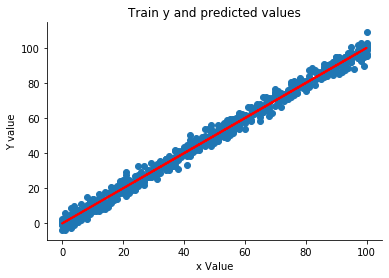

In [21]:
plt.scatter(train['x'], train['y'])
plt.plot(train['x'], y_train_predict, 'r', linewidth=2)
plt.title('Train y and predicted values')
plt.ylabel('Y value')
plt.xlabel('x Value')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

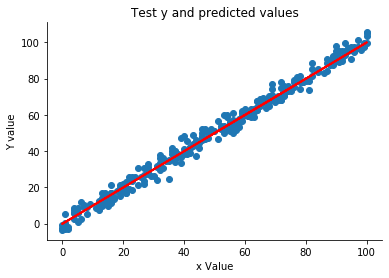

In [22]:
plt.scatter(test['x'], test['y'])
plt.plot(test['x'], y_test_predict, 'r', linewidth=2)
plt.title('Test y and predicted values')
plt.ylabel('Y value')
plt.xlabel('x Value')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [23]:
print('The MAE of Train Data',mean_absolute_error(train['y'], y_train_predict))
print('The MSE of Train Data',mean_squared_error(train['y'], y_train_predict))
print('The R-squred of Train Data',r2_score(train['y'], y_train_predict))

The MAE of Train Data 2.2271519536455577
The MSE of Train Data 7.867752733487686
The R-squred of Train Data 0.9907015319025518


In [24]:
print('The MAE of Test Data',mean_absolute_error(test['y'], y_test_predict))
print('The MSE of Test Data',mean_squared_error(test['y'], y_test_predict))
print('The R-squred of Test Data',r2_score(test['y'], y_test_predict))

The MAE of Test Data 2.415771850041258
The MSE of Test Data 9.432922192039305
The R-squred of Test Data 0.9888014444327563
